In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

# Exploratory data analysis

In [3]:
cars = pd.read_csv('data/preprocessed_data.csv')
cars.head()

,label,model,generation,modification,year,mileage,condition,doors_num,body,engine,transmission,color,drive,wheel,package,price,restyling
0,Audi,A4,B9,150,2017.0,89000.0,не битый,4.0,седан,бензин,робот,зелёный,передний,левый,Base,1490000,Нет
1,Audi,Q5,I,170,2012.0,104000.0,не битый,5.0,внедорожник,дизель,робот,чёрный,полный,левый,Base,950000,Да
2,Audi,A8,D4,310,2014.0,41000.0,битый,4.0,седан,бензин,автомат,чёрный,полный,левый,Base,960000,Да
3,Audi,Q5,I,211,2010.0,113043.0,не битый,5.0,внедорожник,бензин,робот,серый,полный,левый,Base,897000,Нет
4,Audi,A8,D2,174,1996.0,460000.0,не битый,4.0,седан,бензин,механика,синий,передний,левый,Base,200000,Нет


### Целевая переменная Price 

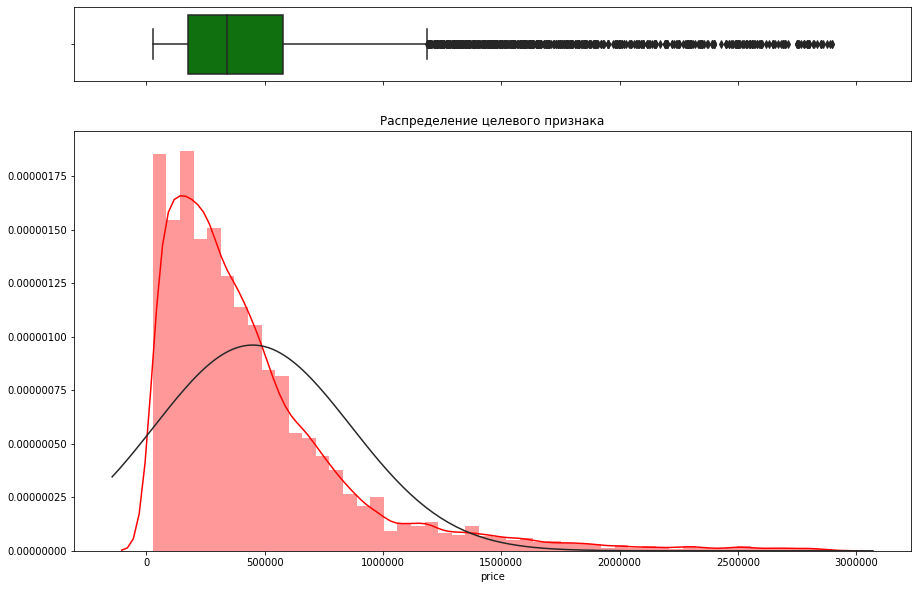

In [5]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.distplot(cars['price'], fit=st.norm, ax=ax_hist, color='r')
sns.boxplot(cars['price'], ax=ax_box, color='g')
 
ax_box.set(xlabel='')
plt.title("Распределение целевого признака")
plt.show()

Выполним log-преобразование:

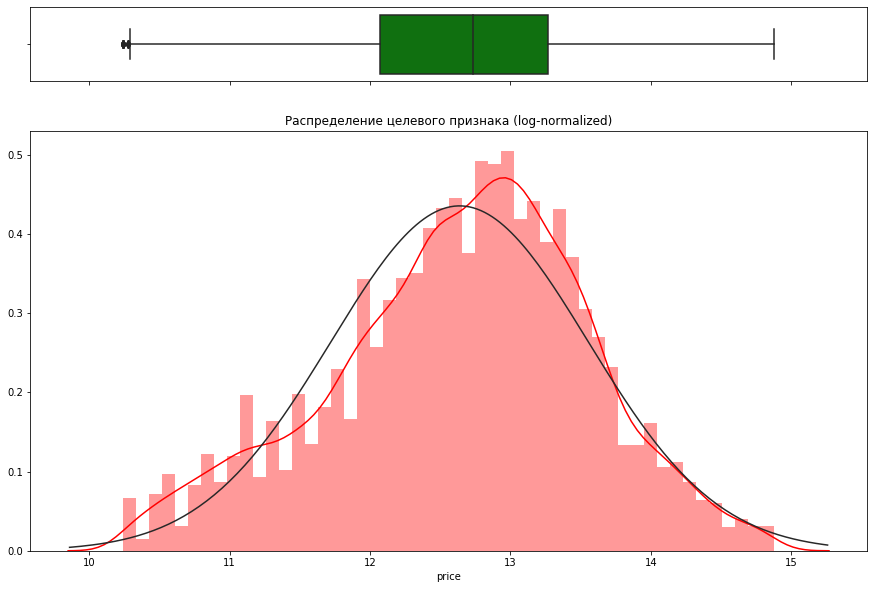

In [6]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.distplot(cars['price'].map(np.log), fit=st.norm, ax=ax_hist, color='r')
sns.boxplot(cars['price'].map(np.log), ax=ax_box, color='g')
 
ax_box.set(xlabel='')
plt.title("Распределение целевого признака (log-normalized)")
plt.show()

- Распределение целевого признака (цены) достаточно близко к логнормальному.

### Распределения признаков 

In [7]:
def plot_real_dist():
    features = ['modification', 'year', 'mileage']
    f, ax = plt.subplots(3, 1, figsize=(15,12))
    for idx, feature in enumerate(features):
        sns.distplot(cars[(cars[feature] < cars[feature].quantile(.99)) \
                          & (cars[feature] > cars[feature].quantile(.1))][feature], ax=ax[idx], color='k')
        #ax[idx].set_title(f"Признак {feature}")
    
    f.tight_layout()
    f.subplots_adjust(top=0.95)
    f.suptitle("Распределения вещественных признаков")
    plt.show()

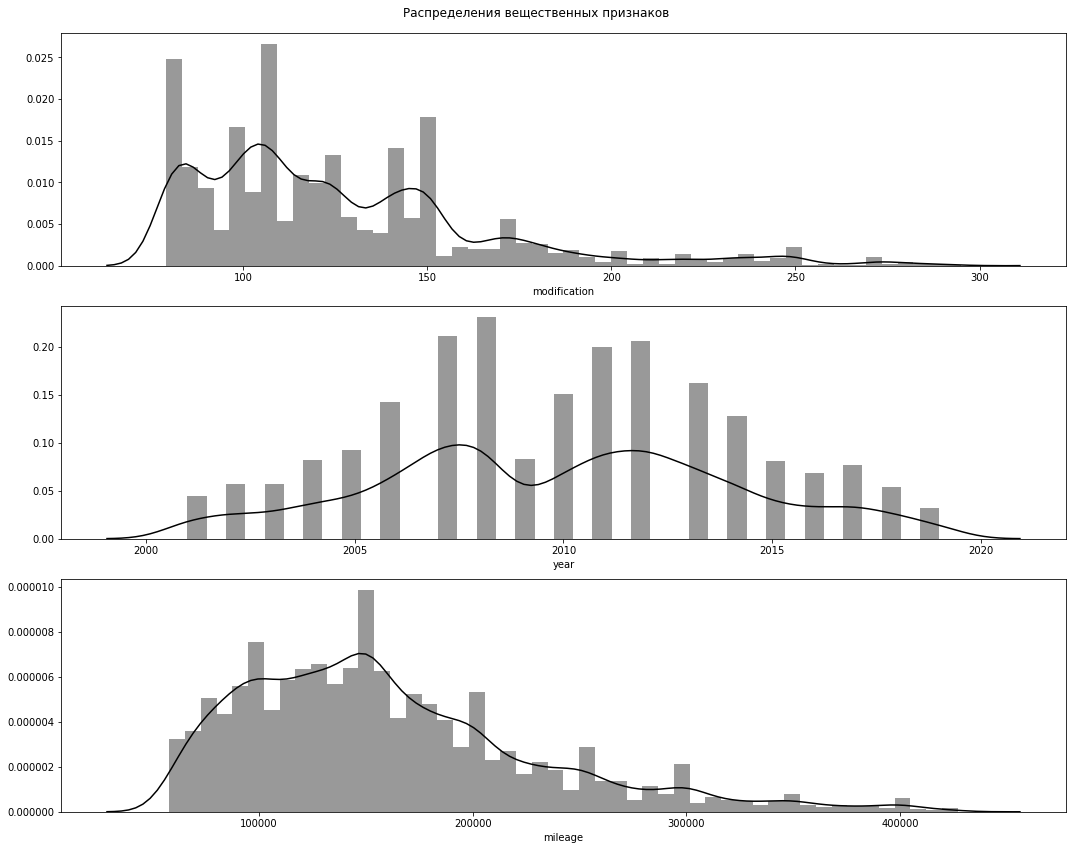

In [8]:
plot_real_dist()

- Большинство автомобилей имеет мощность в пределах 70-150 л.с.
- В основном автомобили, выставленные на продажу, были выпущены в 2007-2008 и 2011-2012 годах  
- Чаще всего продают автомобили, когда их пробег составляет ~ 150000 км  

In [9]:
def plot_categorical_dist(feature, figsize=(14,10), vertical=False):
    f, ax = plt.subplots(figsize=figsize)
    if vertical:
        sns.countplot(x=feature, data=cars, order=cars[feature].value_counts().iloc[:20].index, palette="hls")
    else:
        sns.countplot(y=feature, data=cars, order=cars[feature].value_counts().iloc[:20].index, palette="hls")
    ax.set(xlabel="")
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    b, t = plt.ylim()
    plt.ylim(b+0.5, t-0.5)
    f.tight_layout()
    plt.title(f"Распределение признака {feature}")
    plt.show()

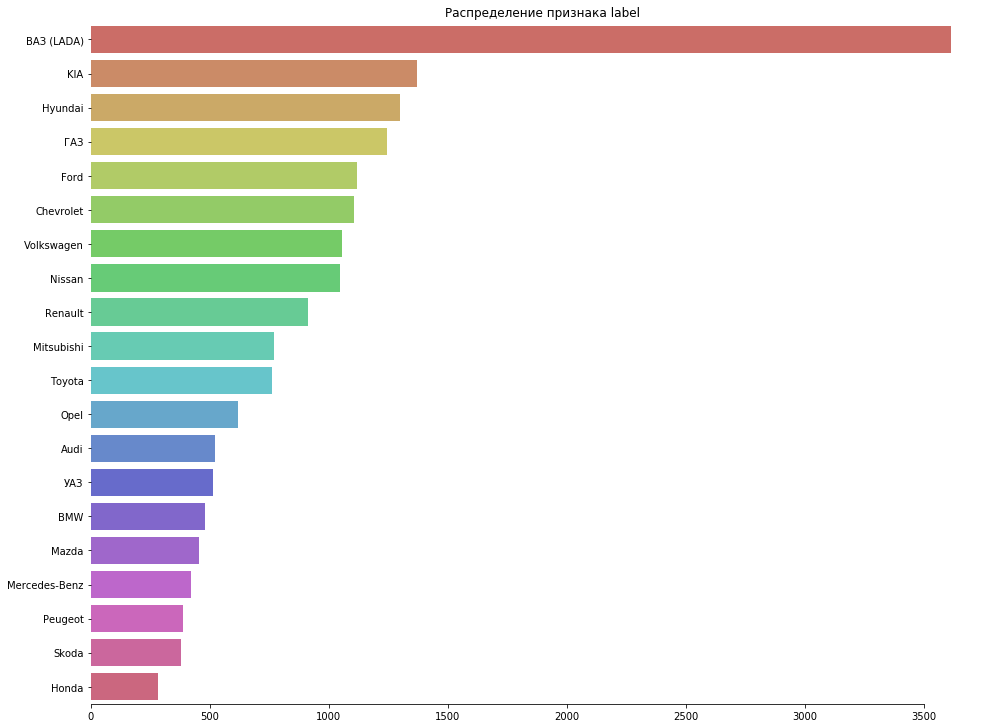

In [10]:
plot_categorical_dist('label')

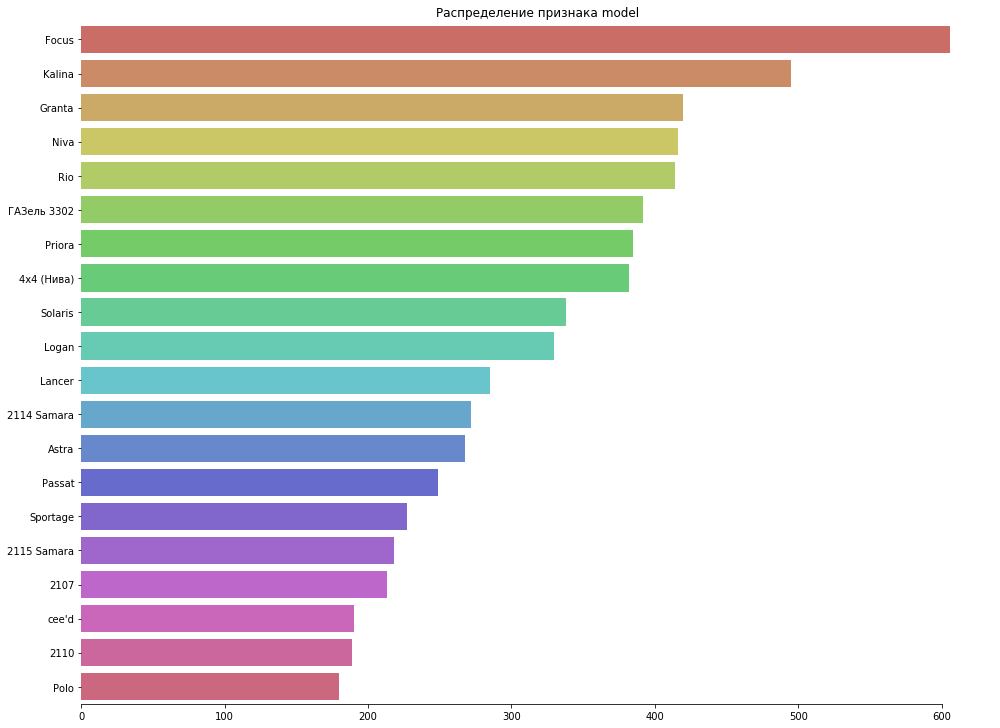

In [11]:
plot_categorical_dist('model')

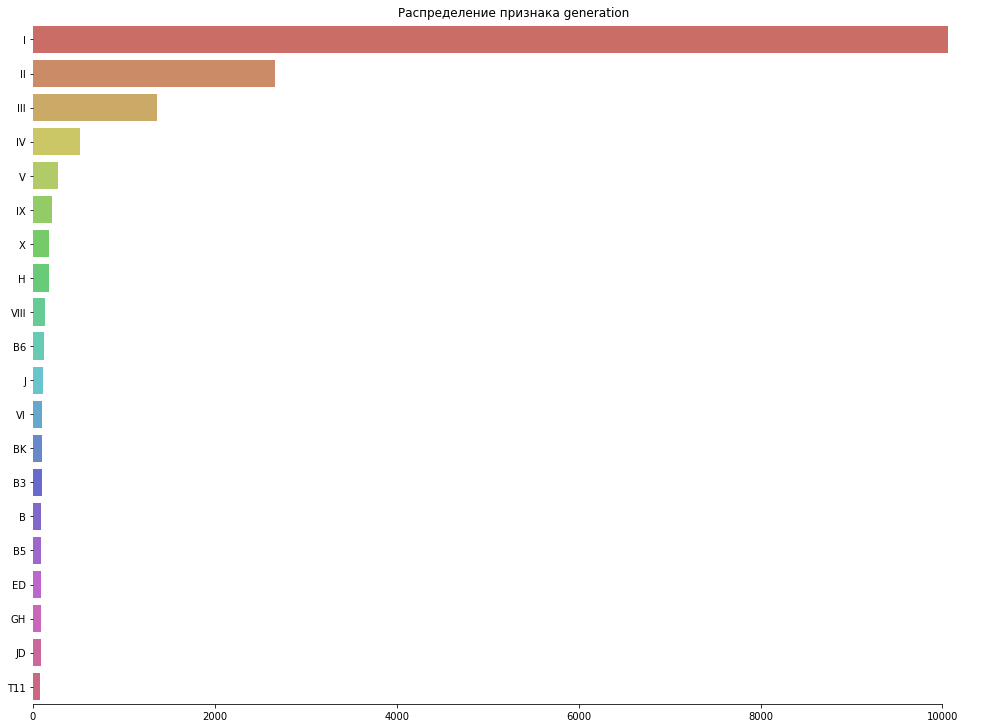

In [12]:
plot_categorical_dist('generation')

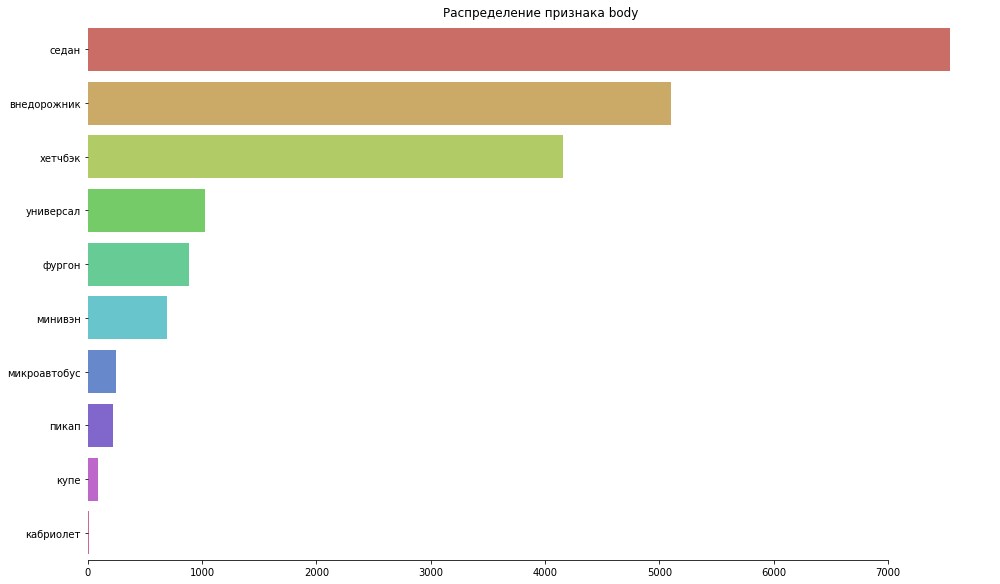

In [13]:
plot_categorical_dist('body', (14,8))

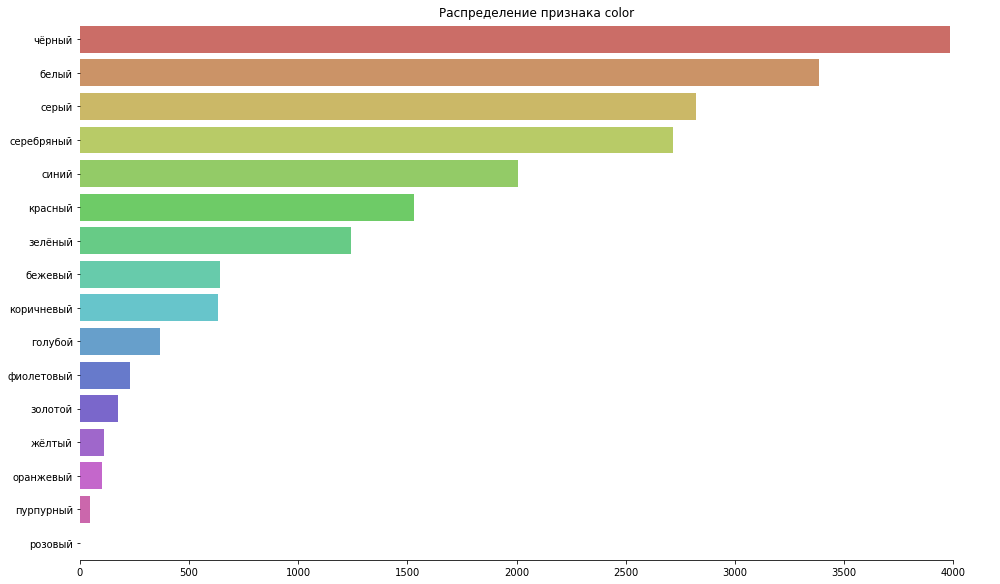

In [14]:
plot_categorical_dist('color', (14,8))

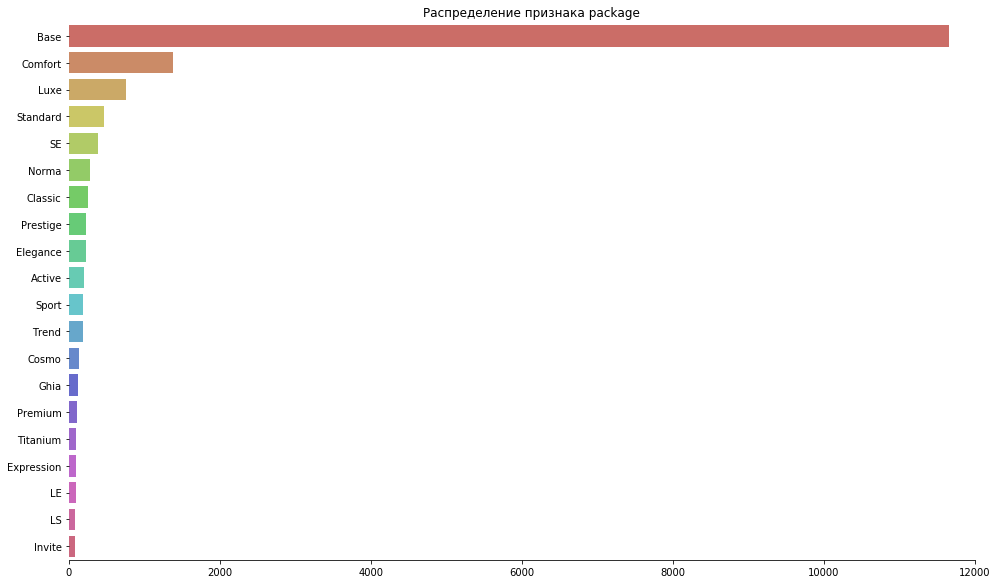

In [15]:
plot_categorical_dist('package', (14,8))

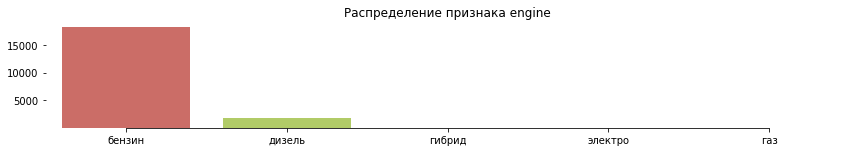

In [16]:
plot_categorical_dist('engine', (12,2), True)

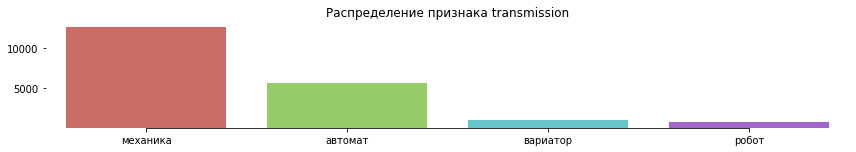

In [17]:
plot_categorical_dist('transmission', (12,2), True)

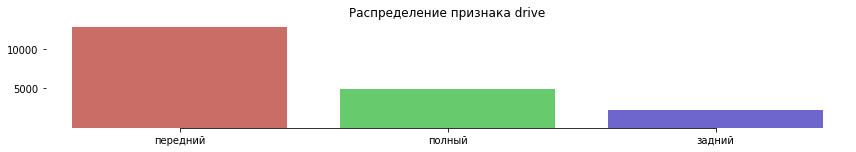

In [18]:
plot_categorical_dist('drive', (12,2), True)

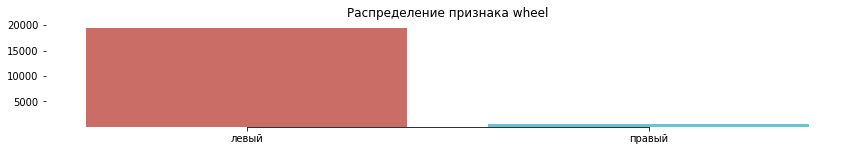

In [19]:
plot_categorical_dist('wheel', (12,2), True)

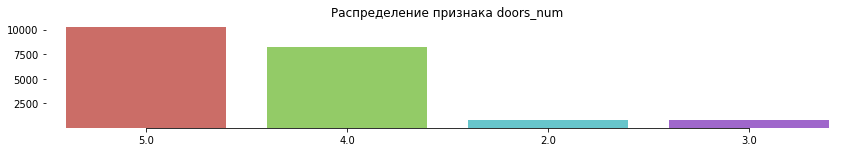

In [20]:
plot_categorical_dist('doors_num',(12,2), True)

## Зависимость цены от категориальных признаков 

In [21]:
def plot_dependence(feature, data=cars, figsize=(15,8)):
    f, ax = plt.subplots(figsize=figsize)
    ax.set_xscale("log")
    sns.boxplot(x="price", y=feature, data=data.sort_values('price', ascending=False),
                whis="range", palette='RdBu_r')
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    b, t = plt.ylim()
    plt.ylim(b+0.5, t-0.5)
    f.tight_layout()
    plt.title(f"Зависимость цены от {feature}")
    plt.show()

In [22]:
def only_common_values(feature, threshold=150):
    values_to_plot = set() 
    
    for idx, value in enumerate(cars[feature].value_counts().index):
        total_ads = cars[feature].value_counts()[idx]
        if total_ads < threshold:
            break
        values_to_plot.add(value)
    
    data = cars[cars[feature].apply(lambda x: x in values_to_plot)]
    return data

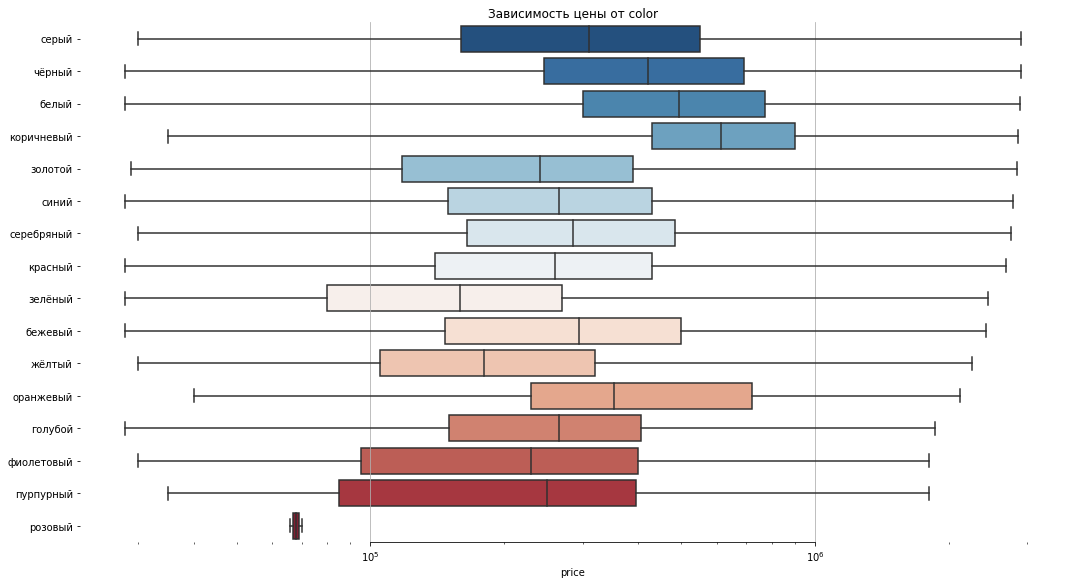

In [23]:
plot_dependence('color')

- Автомобили коричневого цвета имеют наиболее высокую цену по медиане

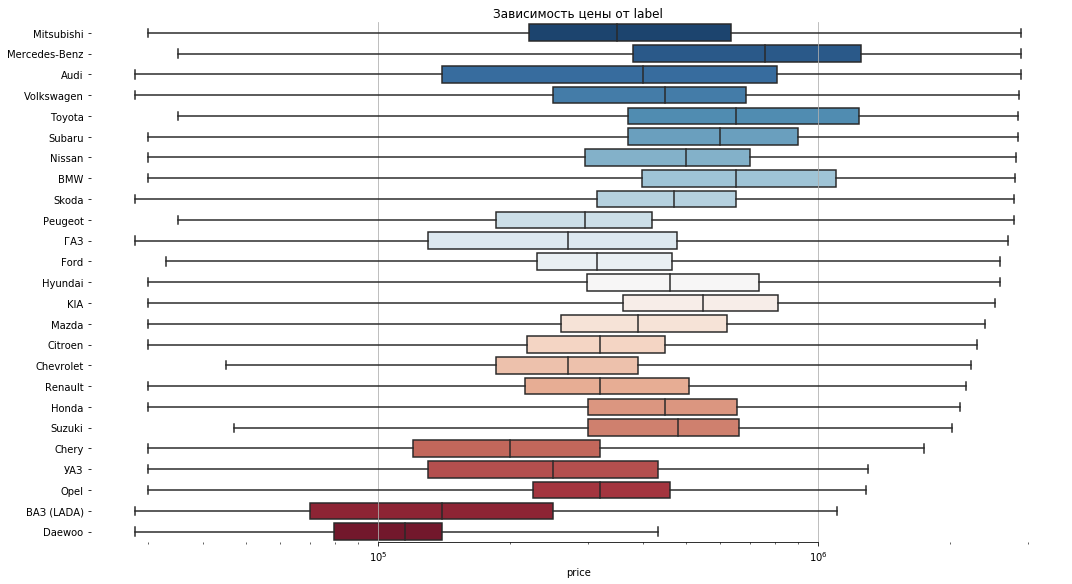

In [24]:
plot_dependence('label', only_common_values('label'))

- Самые дорогие марки автомобиля - Mercedes-Benz и Mitsubishi
- Автомобили марки Audi имеют наболее большой разброс в ценах
- Автомобили ВАЗ являются одними из самых дешевых

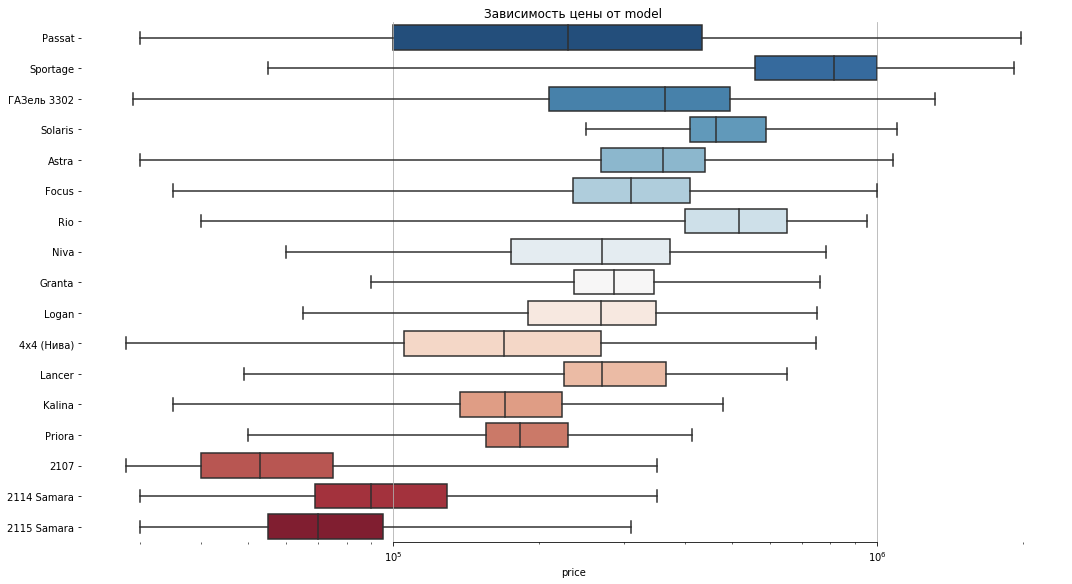

In [25]:
plot_dependence('model', only_common_values('model', 200))

- Volkswagen Passat имеет наиболее большой разброс в ценах, и автомобиль данной модели является самым дорогим
- KIA Sportage имеют наиболее высокие цены по медиане
- Автомобили ВАЗ (LADA) имеют самые дешевые модели

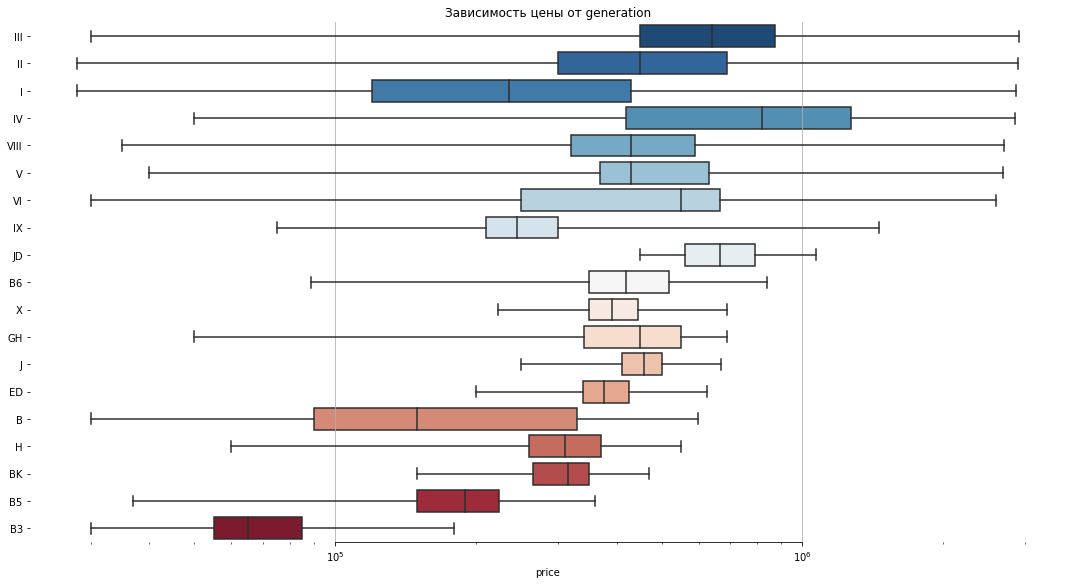

In [26]:
plot_dependence('generation', only_common_values('generation', 80))

- Volkswagen Passat B3 являются одними из самых дешевых автомобилей

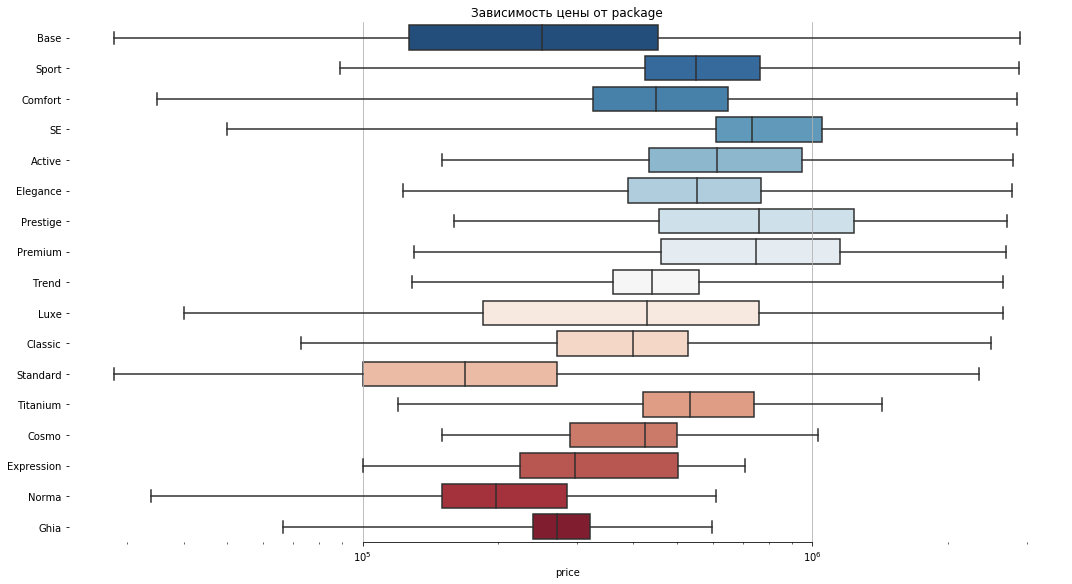

In [27]:
plot_dependence('package', only_common_values('package', 100))

- Автомобили базовой комплектации  имеют самый большой разброс в цене
- Автомобили комплектации Premium имеют наиболее высокую цену по медиане

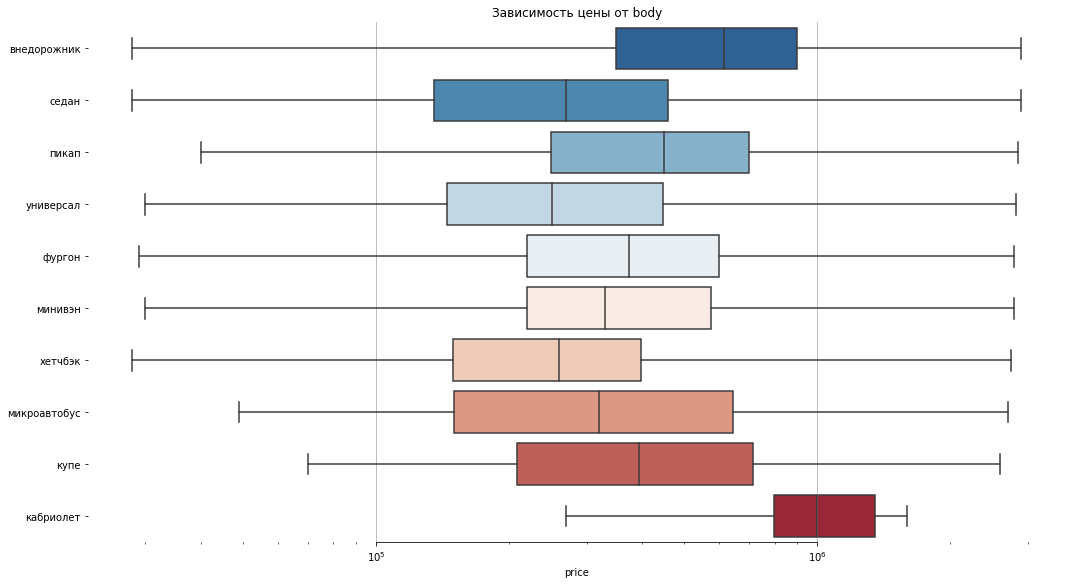

In [28]:
plot_dependence('body', figsize=(15,8))

- Внедорожники - самые дорогие автомобили
- В среднем кабриолеты продаются за 1.000.000 рублей

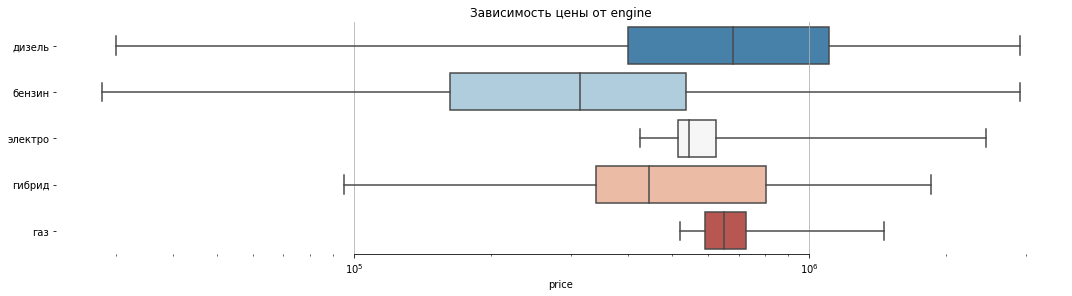

In [29]:
plot_dependence('engine', figsize=(15,4))

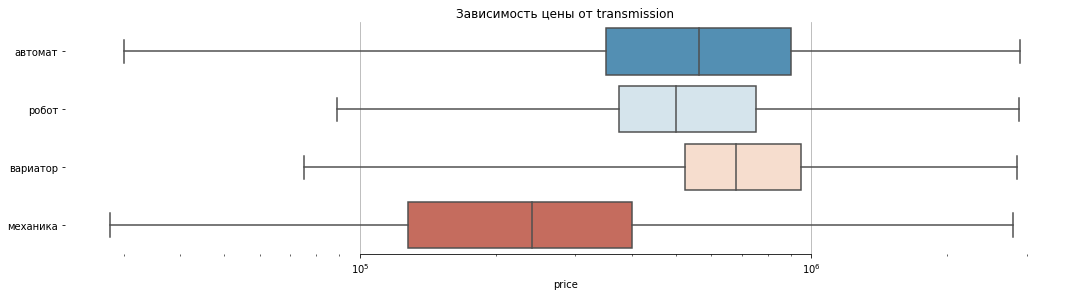

In [30]:
plot_dependence('transmission', figsize=(15,4))

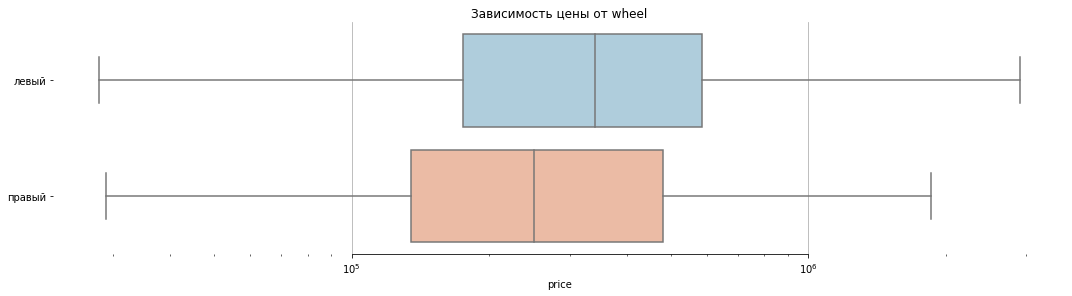

In [31]:
plot_dependence('wheel', figsize=(15,4))

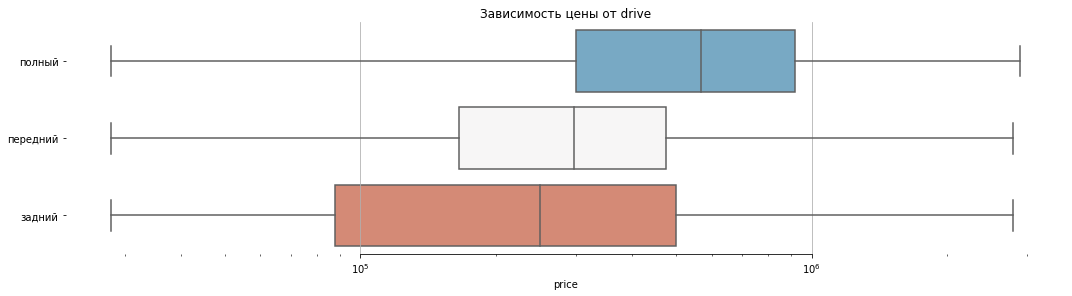

In [32]:
plot_dependence('drive', figsize=(15,4))

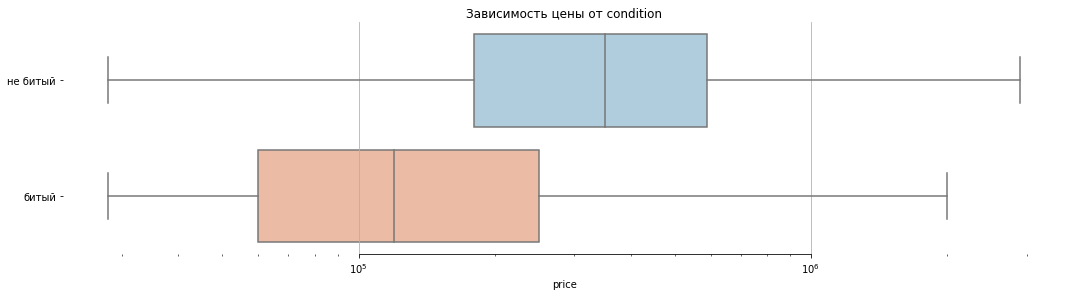

In [33]:
plot_dependence('condition', figsize=(15,4))

- Достаточно очевидно

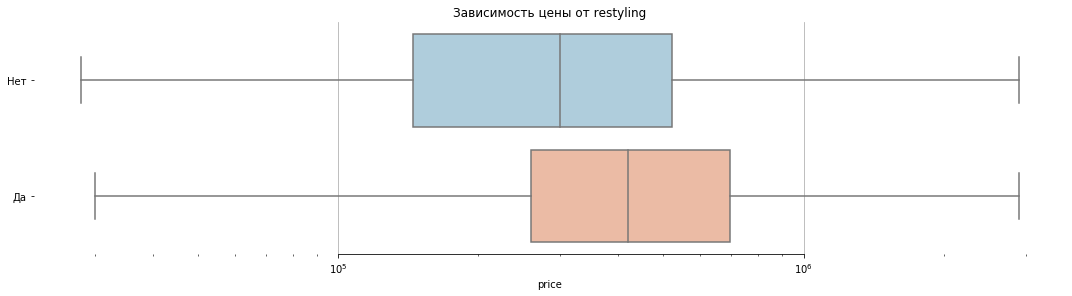

In [34]:
plot_dependence('restyling', figsize=(15,4))

- Рестайлинг повышает стоимость автомобиля

## Вещественные признаки 

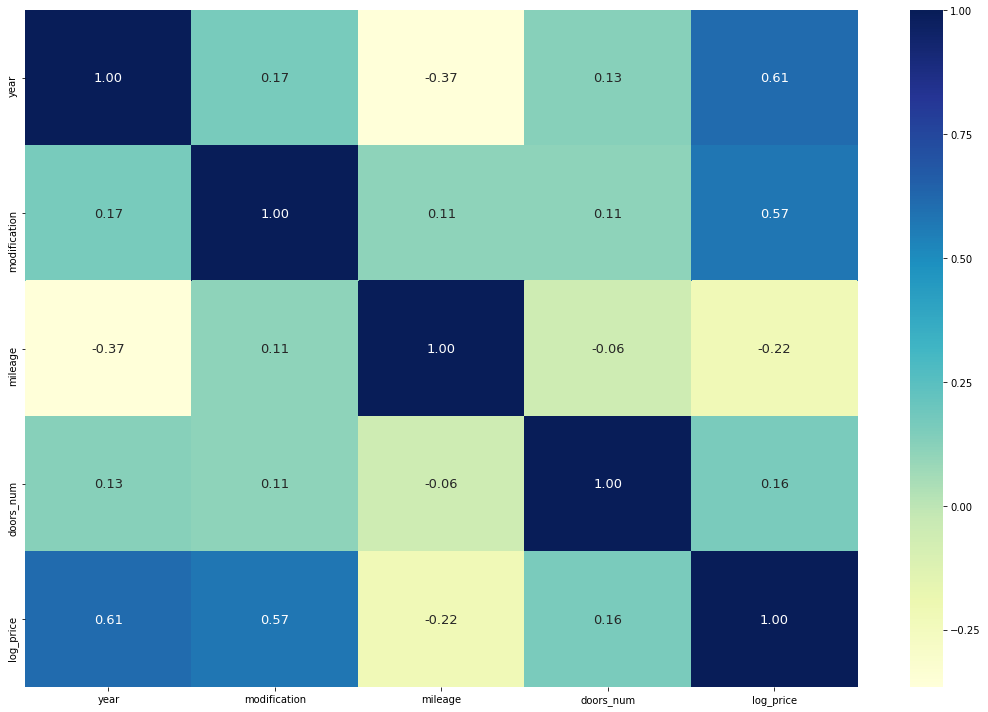

In [35]:
plt.figure(figsize=(15,10))
cars['log_price'] = cars['price'].apply(lambda x: np.log(x))
corr_matrix=cars[['year', 'modification', 'mileage', 'doors_num', 'log_price']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 13})
b, t = plt.ylim() 
plt.ylim(b+0.5, t-0.5)
plt.tight_layout()
plt.show()

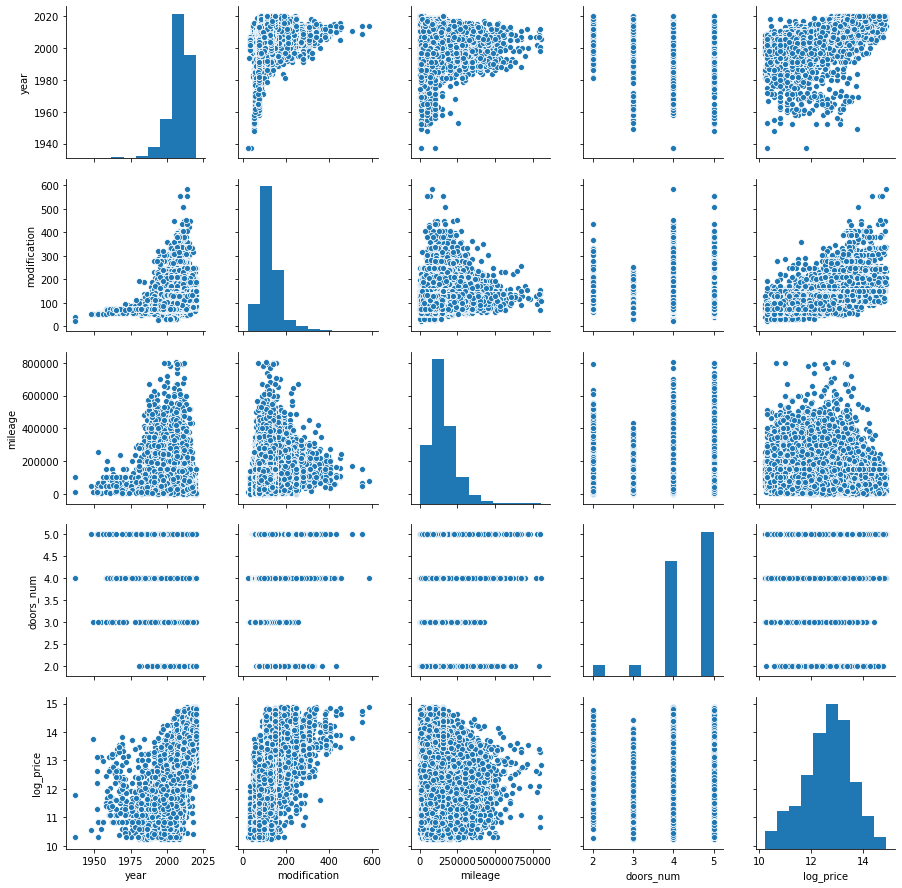

In [36]:
sns.pairplot(cars[['year', 'modification', 'mileage', 'doors_num', 'log_price']]);

Посмотрим на некоторые графики поближе:

In [37]:
def plot_corr(first_feature, second_feature, data=cars):
    f, ax = plt.subplots(figsize=(15,4))
    sns.regplot(x=first_feature, y=second_feature, data=data, ax=ax, color='c');

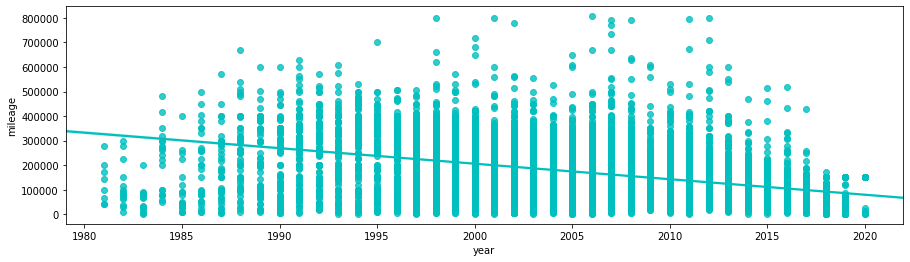

In [38]:
plot_corr('year', 'mileage', cars[cars['year'] > 1980])

- Чем позже выпущен автомобиль и куплен соответственно, тем меньше пробег

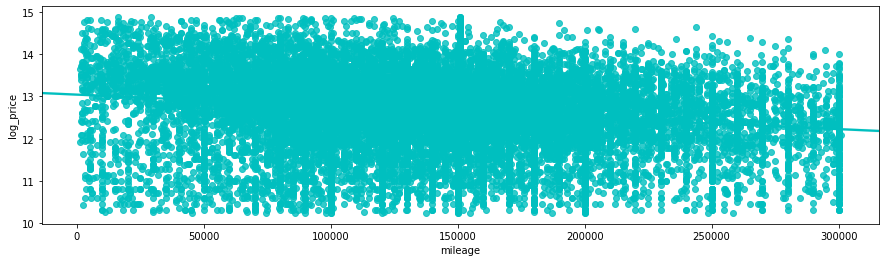

In [40]:
plot_corr('mileage', 'log_price', cars[cars['mileage'] < cars['mileage'].quantile(0.95)])

- С увеличением пробега цена падает, но не сильно

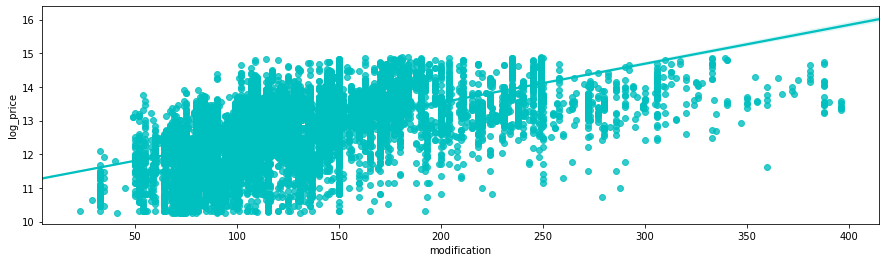

In [41]:
plot_corr('modification', 'log_price', cars[cars['modification'] <= 400])

- С увеличением мощности автомобиля растет и стоимость

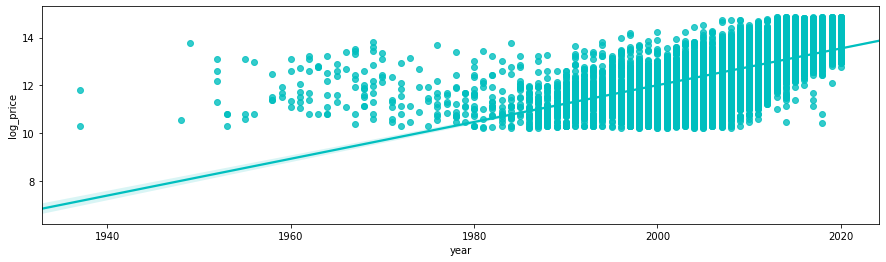

In [42]:
plot_corr('year', 'log_price')

Скорее всего, автомобили, выпущенные раньше 1980 года, являются ретро, поэтому посмотрим на зависимость цены от года > 1980:

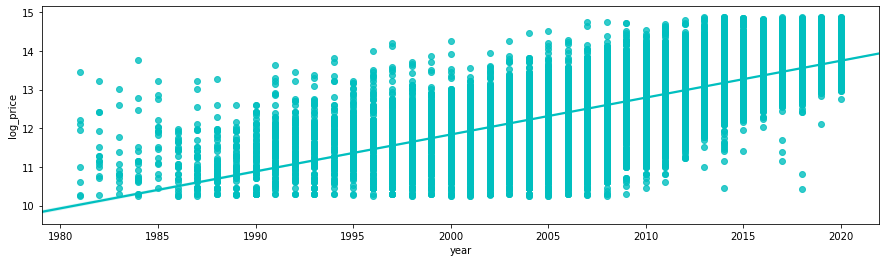

In [43]:
plot_corr('year', 'log_price', cars[cars['year'] > 1980])

- Ожидаемо - чем автомобиль новее, тем дороже